Consigna:<br>
<img src="./Consigna1.PNG" align="center" width="80%" />

In [2]:

from sympy import *

import matplotlib.pyplot as plt

from scipy import signal

import math as m

print("Resuelvo la primer celda")

####Determino variables#######

R1, C1, L1 = symbols('R1 C1 L1')

####Determino las ecuaciones simultaneas a resolver ####
####Con condiciones de diseño#########

ecuaciones = [
    (1/(C1*R1)-(0.765)).subs(R1,1),
    (1/(L1*C1)-1)  
    ]

####Resuelvo para R1 L1 C1#######

conjunto_sol=solve(ecuaciones,R1,L1, C1, set=True)

###imprimo###
Nombres=conjunto_sol[0]
Soluciones=list(conjunto_sol[1])
for k in range(len(Soluciones)):
    
    print('Solucion #%d' % (k+1))
    for k2, nombre in enumerate(Nombres):
        print('\t%s: %s' % (nombre, Soluciones[k][k2]) )


Resuelvo la primer celda
Solucion #1
	C1: 1.30718954248366
	L1: 0.765000000000000
	R1: R1


In [3]:
print("Resuelvo la segunda celda")

####Determino variables#######

R2, C2, L2 = symbols('R2 C2 L2')

####Determino las ecuaciones simultaneas a resolver ####
####Con condiciones de diseño#########

ecuaciones = [
    (1/(C2*R2)-(1.618)).subs(R2,1),
    (1/(L2*C2)-1)  
    ]

####Resuelvo para R2 L2 C2#######

conjunto_sol=solve(ecuaciones,R2,L2, C2, set=True)

###imprimo###
Nombres=conjunto_sol[0]
Soluciones=list(conjunto_sol[1])
for k in range(len(Soluciones)):
    
    print('Solucion #%d' % (k+1))
    for k2, nombre in enumerate(Nombres):
        print('\t%s: %s' % (nombre, Soluciones[k][k2]) )


Resuelvo la segunda celda
Solucion #1
	C2: 0.618046971569839
	L2: 1.61800000000000
	R2: R2


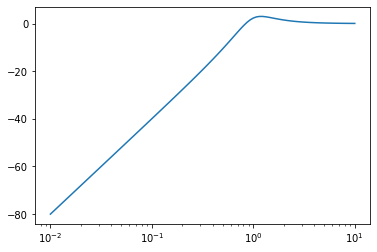

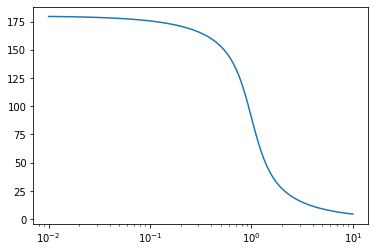

In [4]:
num1=[1,0,0]
den1=[1,0.765,1]
Sys1=signal.TransferFunction(num1,den1)
w, mag, phase = signal.bode(Sys1)
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()
#pzmap(Sys1) pidieron solo modulo y fase pero se podria plotear

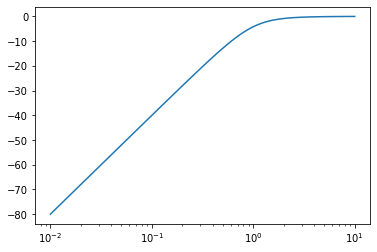

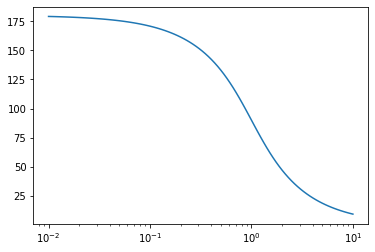

In [5]:
num2=[1,0,0]
den2=[1,1.618,1]
Sys2=signal.TransferFunction(num2,den2)
w, mag, phase = signal.bode(Sys2)
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

In [6]:
##########Constantes de Desnormalizacion#############
N_z=1000
N_w=1000*2*m.pi
####Vector de resistencias Normalizadas#############
#####Se debe inicializar con los valores de tus resistencias########
R_n=[1,1]

####Vector de resistencias Desnormalizadas##########
R=[]
for i in range(len(R_n)):
    
    R.append(R_n[i]*N_z)
    print('R[',i+1,']=',R[i])

####Vector de capacitores Normalizados#############
#####Se debe inicializar con los valores de tus capacitores########
C_n=[1.307,0.618]

####Vector de Capacitores Desnormalizados##########

C=[]
for i in range(len(C_n)):
    C.append(C_n[i]/N_z / N_w)
    print('C[',i+1,']=',C[i])

####Vector de inductores Normalizados#############
#####Se debe inicializar con los valores de tus inductores########
L_n=[0.765,1.618]

####Vector de inductores Desnormalizados##########

L=[]
for i in range(len(L_n)):
    L.append(L_n[i]*N_z*N_w)
    print('L[',i+1,']=',L[i])

R[ 1 ]= 1000
R[ 2 ]= 1000
C[ 1 ]= 2.0801551062110723e-07
C[ 2 ]= 9.835775483079132e-08
L[ 1 ]= 4806636.759992383
L[ 2 ]= 10166193.82701657


Aca agrego la iamgen de como queda el circuito normalizado con los opamp paja dibujarlo con los otros numeros ya los tenia hechos con los num normalizados<br>
<img src="./circuito.jpeg" align="center" width="80%" />

<img src="./Consigna2.PNG" align="center" width="100%" />
<img src="./Matrices.jpeg" align="center" width="80%" />


In [9]:
S= symbols('S')

TC1= Matrix(([1,0],
            [S/2,-1]))
print("TC1=")
pprint(TC1)

TG1= Matrix(([0,2**(1/2)],
            [1/(2**(1/2)),0]))
print("TG1=")
pprint(TG1)

T3= Matrix(([1,(S/2)/(S**2 +1)],
            [0,-1]))
print("T3=")
pprint(T3)

TG2= Matrix(([0,2**(1/2)],
            [1/(2**(1/2)),0]))
print("TG2=")
pprint(TG2)

TC2= Matrix(([1,0],
            [S/2,-1]))
print("TC2=")
pprint(TC2)

TT=TC1*TG1*T3*TG2*TC2
print("TT=")
pprint(TT)

TC1=
⎡1  0 ⎤
⎢     ⎥
⎢S    ⎥
⎢─  -1⎥
⎣2    ⎦
TG1=
⎡        0          1.4142135623731⎤
⎢                                  ⎥
⎣0.707106781186547         0       ⎦
T3=
⎡       S     ⎤
⎢1  ──────────⎥
⎢     ⎛ 2    ⎞⎥
⎢   2⋅⎝S  + 1⎠⎥
⎢             ⎥
⎣0      -1    ⎦
TG2=
⎡        0          1.4142135623731⎤
⎢                                  ⎥
⎣0.707106781186547         0       ⎦
TC2=
⎡1  0 ⎤
⎢     ⎥
⎢S    ⎥
⎢─  -1⎥
⎣2    ⎦
TT=
⎡     -1.0         0 ⎤
⎢                    ⎥
⎢         0.25⋅S     ⎥
⎢-1.0⋅S - ──────  1.0⎥
⎢          2         ⎥
⎣         S  + 1     ⎦
